In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [3]:
main_dir = r'C:\Users\illic\Python\data_hiwi'

In [4]:
# set paths to specific data
WS100_rtu_path = os.path.join(main_dir, r'WS100_ready_to_use.csv')
WS300_rtu_path = os.path.join(main_dir, r'WS300_ready_to_use.csv')
Raine_rtu_path = os.path.join(main_dir, r'Raine_ready_to_use.csv')
L_pcp_rtu_path = os.path.join(main_dir, r'L_pcp_ready_to_use.csv')
lhg_rtu_path = os.path.join(main_dir, r'lhg_rtu.csv')

In [5]:
# read data

# read data and convert to utc
WS100_rtu = pd.read_csv(WS100_rtu_path, sep=',', index_col=0) # , skiprows=1
WS100_rtu.index = pd.to_datetime(WS100_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

WS300_rtu = pd.read_csv(WS300_rtu_path, sep=',', index_col=0) # , skiprows=1
WS300_rtu.index = pd.to_datetime(WS300_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

Raine_rtu = pd.read_csv(Raine_rtu_path, sep=',', index_col=0) # , skiprows=1
Raine_rtu.index = pd.to_datetime(Raine_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

L_pcp_rtu = pd.read_csv(L_pcp_rtu_path, sep=',', index_col=0) # , skiprows=1
L_pcp_rtu.index = pd.to_datetime(L_pcp_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

lhg_rtu = pd.read_csv(lhg_rtu_path, sep=',', index_col=0) # , skiprows=1
lhg_rtu.index = pd.to_datetime(lhg_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

In [6]:
# Ausreißer manuell auf np.nan setzen
WS100_rtu['precipitation.1'][WS100_rtu['precipitation.1'] == WS100_rtu['precipitation.1'].max()] = np.nan

WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan
WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan

L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan
L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan

In [7]:
# precipitation_type für WS100

# 0 = No precipitation
# 60 = Liquid precipitation, e.g. rain
# 70 = Solid precipitation, e.g. snow
# 40 = unspecified precipitation
# (WS401-UMB, WS601-UMB, external
# rain gauge)
# WS100-UMB only:
# 67 = freezing rain
# 69 = sleet
# 90 = hail

In [28]:
reference = Raine_rtu['Niederschlagsmenge']
station = L_pcp_rtu['rr_10']

mask_reference = reference.notnull()
mask_station = station.notnull()

mask = mask_station & mask_reference

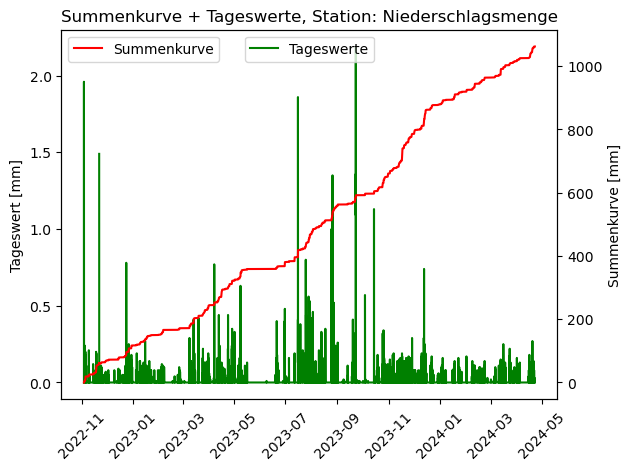

Gesamtniederschlag über Zeitraum: 1062.04 mm



In [31]:
fct.sum_curve(Raine_rtu, 'Niederschlagsmenge', Raine_rtu.index.min(), Raine_rtu.index.max())

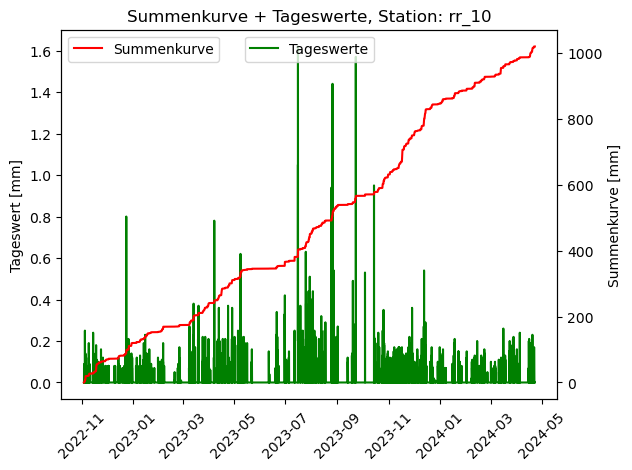

Gesamtniederschlag über Zeitraum: 1019.53 mm



In [30]:
fct.sum_curve(L_pcp_rtu, 'rr_10', Raine_rtu.index.min(), Raine_rtu.index.max())

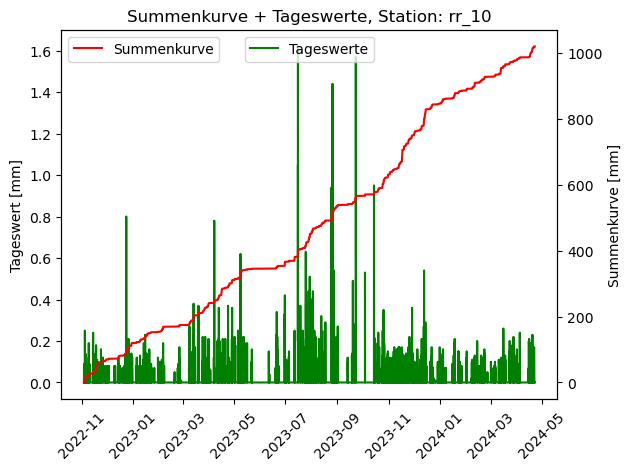

Gesamtniederschlag über Zeitraum: 1019.53 mm



In [29]:
fct.sum_curve(L_pcp_rtu[mask], 'rr_10', Raine_rtu.index.min(), Raine_rtu.index.max())

In [9]:
# Differenz der Niederschlagsmenge, nur mit Timestamps, bei denen beide Stationen einen Wert aufgezeichnet haben

list_stations = [WS100_rtu['precipitation.1'], WS300_rtu['precipitation.1'], L_pcp_rtu['rr_07'], L_pcp_rtu['rr_09'], L_pcp_rtu['rr_10'], lhg_rtu['lhg05'], lhg_rtu['lhg07'], lhg_rtu['lhg09'], lhg_rtu['lhg10'], lhg_rtu['lhg11']]
list_stations_names = ['WS100', 'WS300', 'L_pcp_07', 'L_pcp_09', 'L_pcp_10', 'lhg05', 'lhg07', 'lhg09', 'lhg10', 'lhg11']

reference = Raine_rtu['Niederschlagsmenge']
mask_reference = reference.notnull()

for i in range(len(list_stations)):

    mask_station = list_stations[i].notnull()

    mask = mask_station & mask_reference

    print('Differenz Niederschlagsmenge (' + list_stations_names[i], '- Raine):', round(list_stations[i][mask].sum() - reference[mask].sum(), 2))

Differenz Niederschlagsmenge (WS100 - Raine): -25.34
Differenz Niederschlagsmenge (WS300 - Raine): -27.82
Differenz Niederschlagsmenge (L_pcp_07 - Raine): -50.58
Differenz Niederschlagsmenge (L_pcp_09 - Raine): 8.96
Differenz Niederschlagsmenge (L_pcp_10 - Raine): -42.51
Differenz Niederschlagsmenge (lhg05 - Raine): 395.09
Differenz Niederschlagsmenge (lhg07 - Raine): 513.91
Differenz Niederschlagsmenge (lhg09 - Raine): 0.0
Differenz Niederschlagsmenge (lhg10 - Raine): 515.63
Differenz Niederschlagsmenge (lhg11 - Raine): 265.19


In [10]:
# Summe der Station unter Verwendung von Zeitschritten, die im Raine Index vorhanden sind

print(WS100_rtu[WS100_rtu.index.isin(Raine_rtu.index)]['precipitation.1'].sum())
print(WS300_rtu[WS300_rtu.index.isin(Raine_rtu.index)]['precipitation.1'].sum())
print(L_pcp_rtu[L_pcp_rtu.index.isin(Raine_rtu.index)]['rr_07'].sum())
print(L_pcp_rtu[L_pcp_rtu.index.isin(Raine_rtu.index)]['rr_09'].sum())
print(L_pcp_rtu[L_pcp_rtu.index.isin(Raine_rtu.index)]['rr_10'].sum())
print(lhg_rtu[lhg_rtu['lhg05'].index.isin(Raine_rtu.index)]['lhg05'].sum())
print(lhg_rtu[lhg_rtu['lhg07'].index.isin(Raine_rtu.index)]['lhg07'].sum())
print(lhg_rtu[lhg_rtu['lhg09'].index.isin(Raine_rtu.index)]['lhg09'].sum())
print(lhg_rtu[lhg_rtu['lhg10'].index.isin(Raine_rtu.index)]['lhg10'].sum())
print(lhg_rtu[lhg_rtu['lhg11'].index.isin(Raine_rtu.index)]['lhg11'].sum())

591.61
0.0
1011.4600000000002
1070.9999999999998
1019.53
482.78000000000014
606.0000000000001
0.0
616.1000000000001
326.1290000000001
